# challenge

## Codsoft Data Science Internship

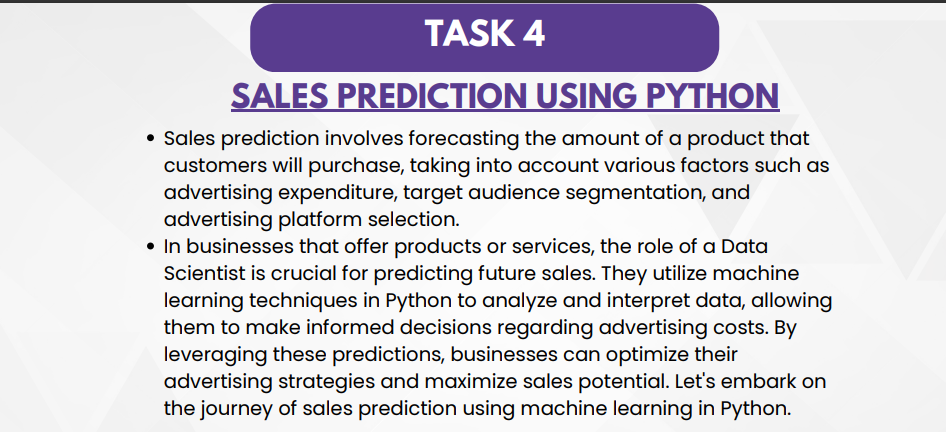

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfs = pd.read_csv(r'C:\Users\Shaikh PC\Downloads\Compressed\sales.csv')

In [3]:
dfs.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dfs.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
dfs.shape
dfs

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
dfs.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dfs.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

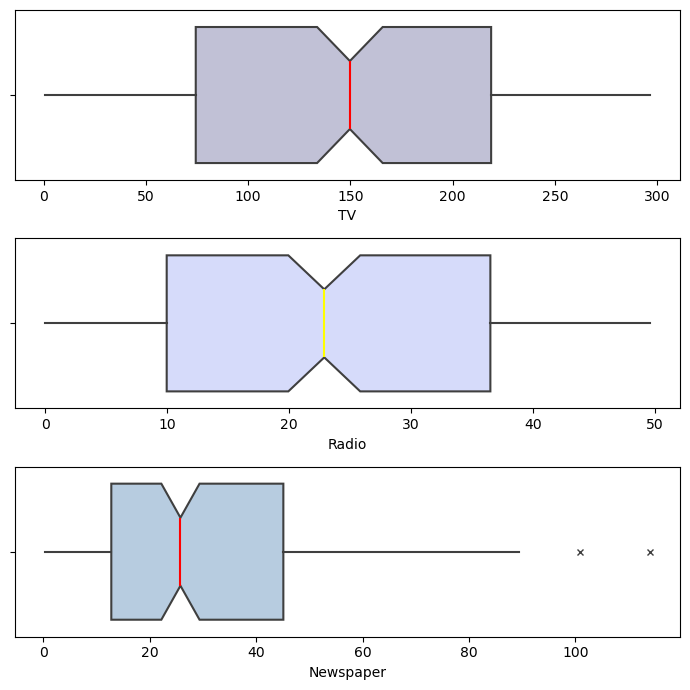

In [27]:
# detecting outliers
fig, axs = plt.subplots(3, figsize = (7,7))
plt1 = sns.boxplot(x = dfs['TV'], ax=axs[0], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .4, .6, .4)},
    medianprops={"color": "red"})
plt2 = sns.boxplot(x = dfs['Radio'],ax=axs[1], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.2, .3, .9, .2)},
    medianprops={"color": "yellow"})
plt3 = sns.boxplot(x = dfs['Newspaper'],ax=axs[2], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .4)},
    medianprops={"color": "red"})

plt.tight_layout()


In [9]:
# Their are no significant outliers present in the dataset

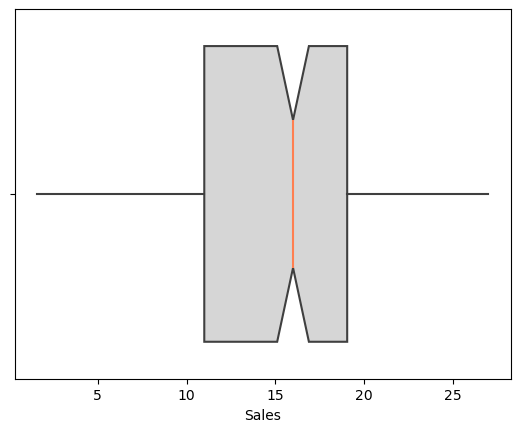

In [28]:
sns.boxplot(x= dfs['Sales'],  notch = True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.8, .8, .8, .8)},
    medianprops={"color": "coral"})
plt.show()

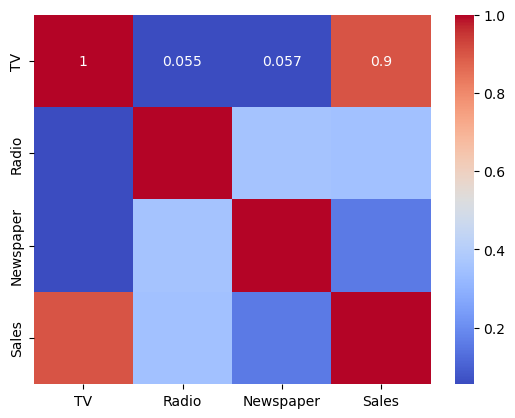

In [30]:
corr = dfs.corr()
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.show()

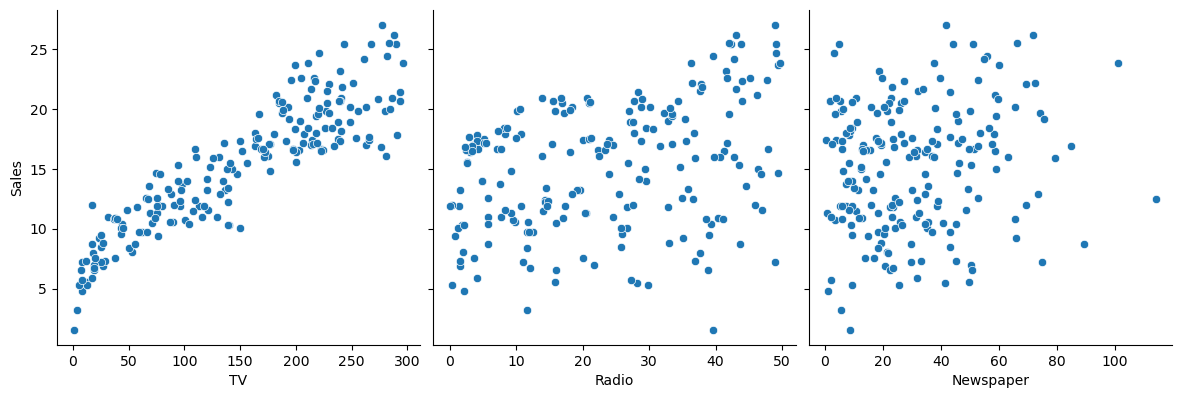

In [44]:
# use scatterplot to see how sales is related to the other variables 
sns.pairplot(dfs, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)

C:\Users\Shaikh PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaikh PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaikh PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


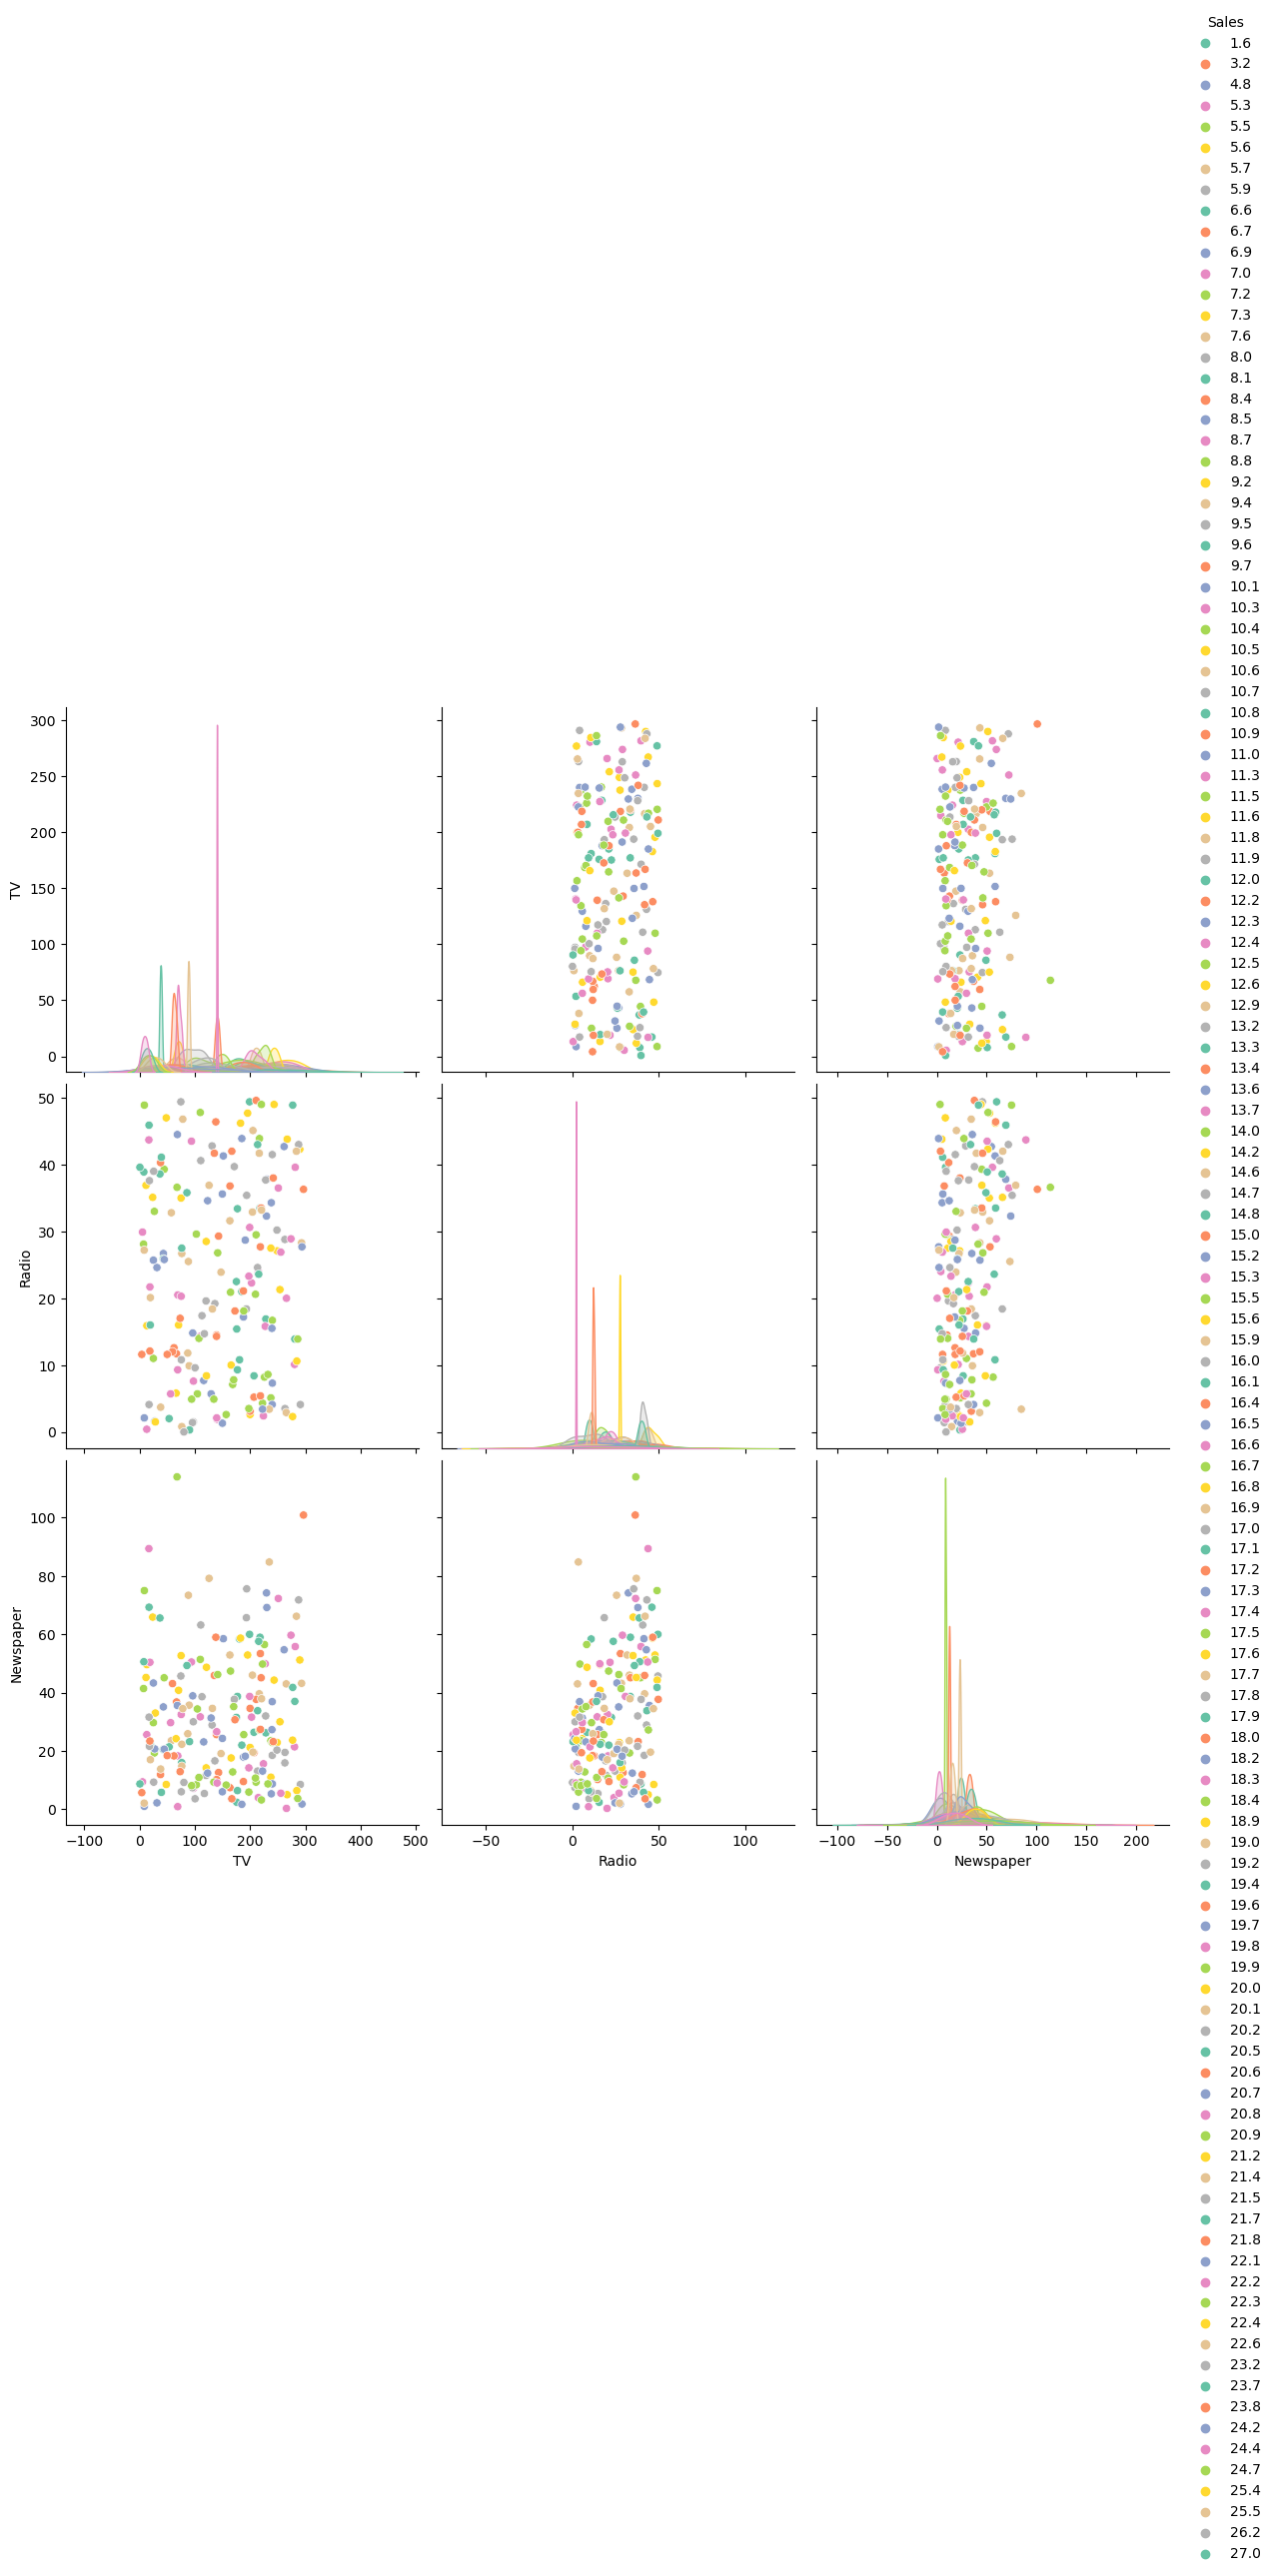

In [42]:
sns.pairplot(dfs, kind = 'scatter', aspect = 1, height = 4, palette = 'Set2', hue='Sales')

The advertisement of TV has the most positive effect on the target(sales) variable

In [14]:
x = dfs['TV']
y = dfs['Sales']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 120)
print(x_train.head())
print(y_train.head())

111    241.7
156     93.9
140     73.4
171    164.5
157    149.8
Name: TV, dtype: float64
111    21.8
156    15.3
140    10.9
171    17.5
157    10.1
Name: Sales, dtype: float64


In [16]:
import statsmodels.api as sm
# constant and the intercept
x_train_sm = sm.add_constant(x_train)
# fit regression line with OLS
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    6.573326
TV       0.058614
dtype: float64

In [17]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.24e-52
Time:                        19:57:35   Log-Likelihood:                -317.66
No. Observations:                 140   AIC:                             639.3
Df Residuals:                     138   BIC:                             645.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5733      0.396     16.582      0.0

R-squared value is around 0.815 which says 81% of the sales is described by TV

Sales = 6.57 + 0.058*TV

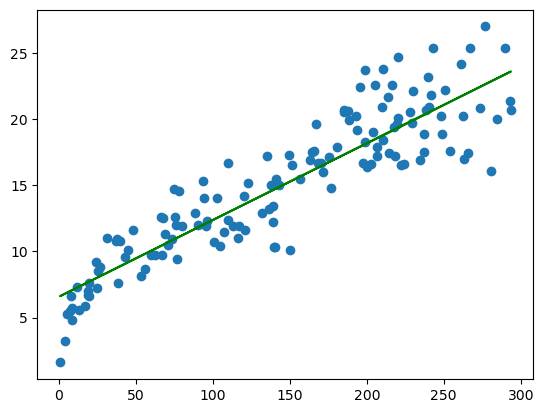

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.57 + 0.058*x_train, 'g')
plt.show()
plt.figure(figsize=(20,20))

In [19]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

C:\Users\Shaikh PC\AppData\Local\Temp\ipykernel_2116\3723081885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15, color = 'black')
C:\Users\Shaikh PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


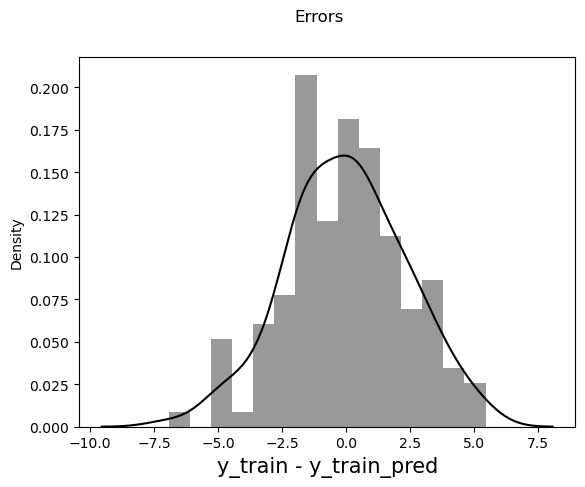

In [35]:
fig = plt.figure()
sns.distplot(res, bins = 15, color = 'black')
fig.suptitle('Errors', fontsize = 12)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

The residuals are normally distributed with 0 mean which is good for the model accuracy



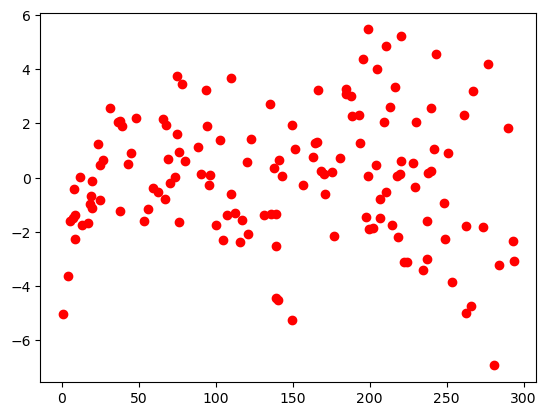

In [39]:
plt.scatter(x_train,res, c= 'red' )
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [23]:
y_pred.head()

87     13.061903
118    13.941114
80     11.051441
198    23.196275
62     20.599672
dtype: float64

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.2074830051093577

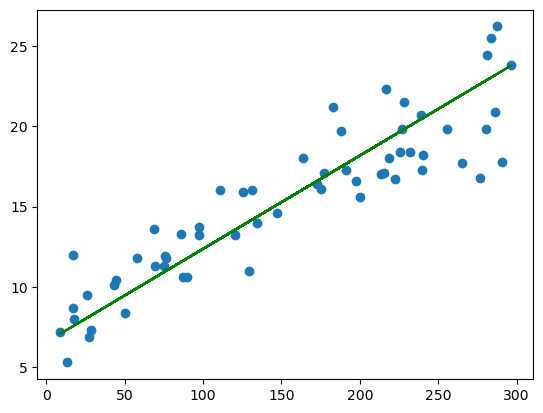

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.57 + 0.058 * x_test, 'g')
plt.show()

# Thank You